In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('ch4Dataset.csv')
df

year  month   decimal  average  average_unc   trend  trend_unc
0    1983      7  1983.542   1626.0          2.3  1635.6        1.5
1    1983      8  1983.625   1628.0          2.9  1636.0        1.4
2    1983      9  1983.708   1638.5          2.3  1636.5        1.3
3    1983     10  1983.792   1644.8          1.4  1637.1        1.2
4    1983     11  1983.875   1642.6          0.8  1637.7        1.2
..    ...    ...       ...      ...          ...     ...        ...
460  2021     11  2021.875   1909.5         -9.9  1903.2       -9.9
461  2021     12  2021.958   1909.6         -9.9  1904.5       -9.9
462  2022      1  2022.042   1908.7         -9.9  1905.8       -9.9
463  2022      2  2022.125   1908.5         -9.9  1906.9       -9.9
464  2022      3  2022.208   1909.2         -9.9  1907.8       -9.9

[465 rows x 7 columns]

<AxesSubplot:title={'center':'Methane Levels'}, xlabel='Date', ylabel='Average'>

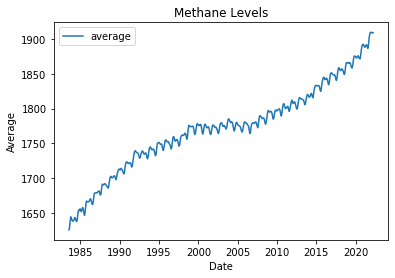

In [5]:
df.plot(x='decimal', xlabel='Date', y='average', ylabel='Average', title='Methane Levels')

In [6]:
df.shape
total = df.shape[0]
total

465

In [7]:
# Check for stationarity

from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [8]:
adfuller_test(df['average'])

ADF Test Statistic : 0.4496476288372932
p-value : 0.9832595992103035
#Lags Used : 13
Number of Observations : 451
weak evidence against null hypothesis, indicating it is non-stationary 


In [25]:
adfuller_test(df['average'].diff(2).dropna())
# d = 1 makes data stationary

df['diff'] = df['average'].diff(2).dropna()

ADF Test Statistic : -3.1451887485196908
p-value : 0.0233847868409646
#Lags Used : 17
Number of Observations : 445
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


C:\Users\Patrick\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


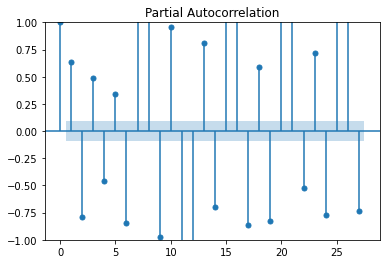

In [21]:
# Check acf/pacf plots for p and q values
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig1 = plot_pacf(df['diff'].dropna())

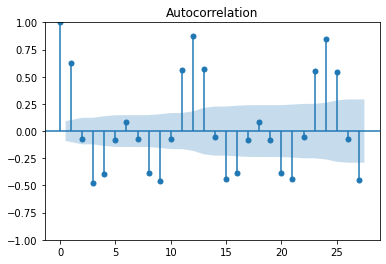

In [22]:
fig2 = plot_acf(df['diff'].dropna())

In [14]:
split = round(df.shape[0]*.9)
split

418

In [15]:
dftrain = df['average'][:split]
dftest = df['average'][split:]

In [99]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(dftrain, order=(2,2,2))
modelfit = model.fit()
predict = modelfit.forecast(total-split)

C:\Users\Patrick\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


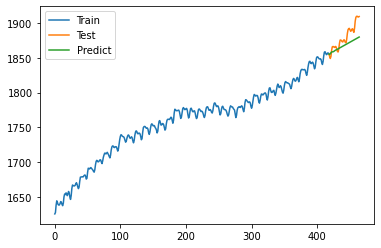

In [100]:
plt.plot(dftrain, label='Train')
plt.plot(dftest, label='Test')
plt.plot(predict, label='Predict')
plt.legend(loc='upper left')
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

def eval_model(actual, predict):
    rmse = f'RMSE = {mean_squared_error(y_true=actual, y_pred=predict, squared=False):.2f}'
    mape = f'MAPE = {mean_absolute_percentage_error(y_true=actual, y_pred=predict):.2f}'
    mae = f'MAE = {mean_absolute_error(y_true=actual, y_pred=predict):.2f}'
    
    print(f'{rmse}\n{mape}\n{mae}')

In [102]:
eval_model(dftest,predict)

RMSE = 15.07
MAPE = 0.01
MAE = 11.91


In [103]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.seasonal import seasonal_decompose

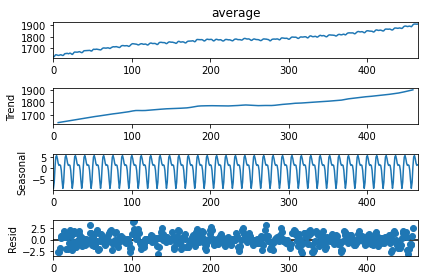

In [104]:
sdecomplot = seasonal_decompose(df['average'], period=12, model='additive').plot()

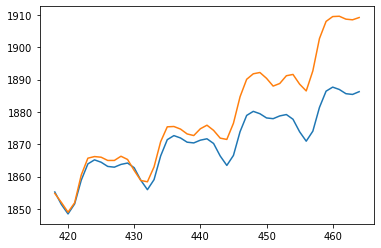

In [105]:
modelfit = HWES(dftrain, trend='add', seasonal='add', seasonal_periods=12).fit()
predict = modelfit.forecast(total-split)
plt.plot(predict)
plt.plot(dftest)
plt.show()

In [106]:
eval_model(dftest,predict)

RMSE = 11.19
MAPE = 0.00
MAE = 8.23


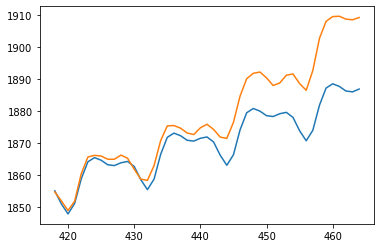

In [108]:
modelfit = HWES(dftrain, trend='mul', seasonal='mul', seasonal_periods=12).fit()
predict = modelfit.forecast(total-split)
plt.plot(predict)
plt.plot(dftest)
plt.show()

In [109]:
eval_model(dftest,predict)

RMSE = 10.91
MAPE = 0.00
MAE = 8.02
